# **Modelling**

### Entrenamiento de modelos de Machine Learning

### **Selección de los Modelos**

1. Decision Tree.
   
2. Random Forest.
   
3. Gradient Boost.
   
4. Logistic Regression.
   
5. Ensemble.

6. SVM.

## **Decision Tree**

El objetivo de crear un modelo de árboles de decisión, será predecir el valor de una variable de destino en función de diversas variables de entrada. 

El árbol de decisión, es de los algoritmos de aprendizaje supervisado no paramétrico más usados en Machine Learning. Se utiliza tanto para tareas de clasificación como de regresión. Tiene una estructura de árbol jerárquica, que consta de un nodo raíz, ramas, nodos internos y nodos hoja.

El proceso de división que hace este algoritmo, se repite de forma recursiva de arriba hacia abajo hasta que todos o la mayoría de los registros se hayan clasificado bajo etiquetas de clase específicas.

#### LIBRERÍAS NECESARIAS

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [29]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
import sklearn

#### EXTRACCIÓN & CARGA DE DATOS

In [3]:
data_train = pd.read_csv('../data/PROCESADO/data_train.csv', sep=',')

In [4]:
data_train

,PassengerId,CryoSleep,Age,VIP,Transported,Add_Services,No_Services,Cabin_Side,Earth,Europa,Mars,55 Cancri e,PSO J318.5-22,TRAPPIST-1e
0,0001_01,0,39.0,0,False,0.0,1,0,0,1,0,0,0,1
1,0002_01,0,24.0,0,True,736.0,0,1,1,0,0,0,0,1
2,0003_01,0,58.0,1,False,10383.0,0,1,0,1,0,0,0,1
3,0003_02,0,33.0,0,False,5176.0,0,1,0,1,0,0,0,1
4,0004_01,0,16.0,0,True,1091.0,0,1,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,0,41.0,1,False,8536.0,0,0,0,1,0,1,0,0
8689,9278_01,1,18.0,0,False,0.0,1,1,1,0,0,0,1,0
8690,9279_01,0,26.0,0,True,1873.0,0,1,1,0,0,0,0,1
8691,9280_01,0,32.0,0,False,4637.0,0,1,0,1,0,1,0,0


### **Preparación del Entrenamiento**

In [9]:
X = data_train.drop("Transported", axis=1)
y = data_train["Transported"]

#### Separamos los datos en dos conjuntos, uno para el entrenamiento (train), y otro para la validación (test). 70% para el entrenamiento(train), y el 30% de los datos para la validación(test)

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 45)

print(f'TRAIN = X_train:{X_train.shape}, y_train:{y_train.shape}')
print(f'TEST = X_test:{X_test.shape}, y_test:{y_test.shape}')

TRAIN = X_train:(6085, 13), y_train:(6085,)
TEST = X_test:(2608, 13), y_test:(2608,)


In [12]:
de_tree = DecisionTreeClassifier(max_depth = 3, random_state = 45, class_weight = 'balanced')

de_tree.fit(X_train, y_train)

DecisionTreeClassifier(class_weight='balanced', max_depth=3, random_state=45)

In [38]:
predic_tree = de_tree.predict(X_train)
predic_tree1 = de_tree.predict(X_test) 

print("DECISION TREE:")

print('Precisión del Entrenamiento: {0}%'.format(np.round(de_tree.score(X_train, y_train) * 100, 2)))

print('Precisión del Test: {0}%'.format(np.round(de_tree.score(X_test, y_test) * 100, 2)))

DECISION TREE:
Precisión del Entrenamiento: 73.38%
Precisión del Test: 74.65%


### Ajuste de parámetros

In [15]:
pm_tree = {'max_depth': range(1, 15)}

best_tree = GridSearchCV(DecisionTreeClassifier(random_state = 45), pm_tree, cv = 7)                  

best_tree.fit(X_train, y_train)

GridSearchCV(cv=7, estimator=DecisionTreeClassifier(random_state=45),
             param_grid={'max_depth': range(1, 15)})

In [41]:
print("Mejores Parámetros:", best_tree.best_params_)

print('Mejor validación cruzada: {0}%'.format(np.round(best_tree.score(X_train, y_train) * 100, 2)))

Mejores Parámetros: {'max_depth': 3}
Mejor validación cruzada: 73.38%


In [46]:
de_tree = DecisionTreeClassifier(max_depth = 3, random_state = 45)

de_tree.fit(X_train, y_train)

predic_tree = de_tree.predict(X_test) 

print("Validación Cruzada (Max_depth=3)", accuracy_score(y_test, predic_tree) * 100,'%')

Validación Cruzada (Max_depth=3) 74.65490797546013 %


### **Visualización**

In [18]:
iris = load_iris()
X = iris.data[:, 2:]
y = iris.target

tree_clf = DecisionTreeClassifier(max_depth = 3, random_state = 45)
tree_clf.fit(X, y)

DecisionTreeClassifier(max_depth=3, random_state=45)

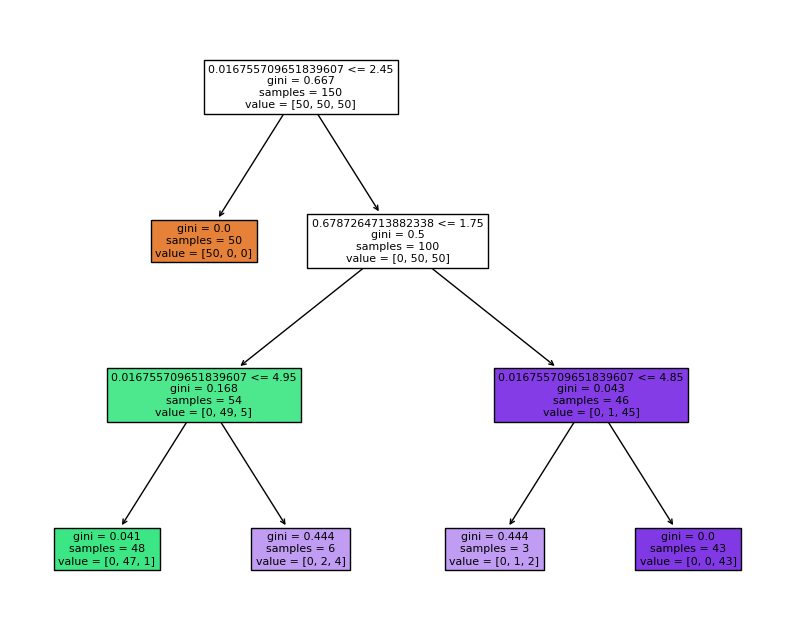

In [28]:
plt.figure(figsize=(10, 8))

sklearn.tree.plot_tree(tree_clf, feature_names = de_tree.feature_importances_, filled = True);

### Matriz de Confusión 

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


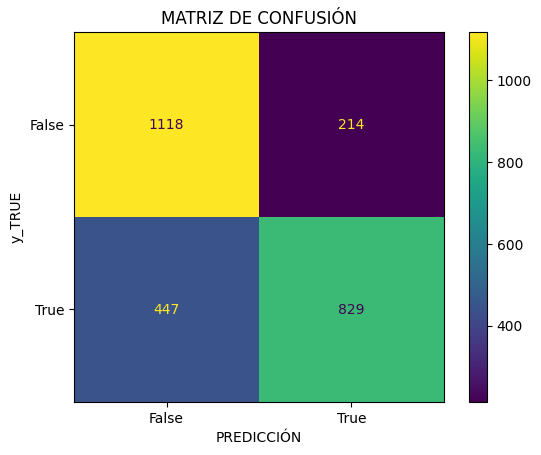

In [27]:
plot_confusion_matrix(de_tree, X_test, y_test)
plt.xlabel("PREDICCIÓN")
plt.ylabel("y_TRUE")
plt.title("MATRIZ DE CONFUSIÓN")
plt.show();

### **VALIDACIÓN/TEST**

#### CARGA DE DATOS

In [30]:
data_test = pd.read_csv('../data/PROCESADO/data_test.csv', sep=',')

In [31]:
data_test

,PassengerId,CryoSleep,Age,VIP,Add_Services,No_Services,Cabin_Side,Earth,Europa,Mars,55 Cancri e,PSO J318.5-22,TRAPPIST-1e
0,0013_01,1,27.0,0,0.0,1,1,1,0,0,0,0,1
1,0018_01,0,19.0,0,2832.0,0,1,1,0,0,0,0,1
2,0019_01,1,31.0,0,0.0,1,1,0,1,0,1,0,0
3,0021_01,0,38.0,0,7418.0,0,1,0,1,0,0,0,1
4,0023_01,0,20.0,0,645.0,0,1,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4272,9266_02,1,34.0,0,0.0,1,1,1,0,0,0,0,1
4273,9269_01,0,42.0,0,1018.0,0,1,1,0,0,0,0,1
4274,9271_01,1,26.0,0,0.0,1,0,0,0,1,1,0,0
4275,9273_01,0,26.0,0,3203.0,0,0,0,1,0,0,0,1


### **PREDICCIÓN**

In [32]:
predic = pd.DataFrame(de_tree.predict(data_test))

predic['PassengerId'] = data_test['PassengerId']

predic = predic.rename(columns = {0:'Transported'})

predic = predic[['PassengerId','Transported']]

In [33]:
predic

,PassengerId,Transported
0,0013_01,True
1,0018_01,False
2,0019_01,True
3,0021_01,False
4,0023_01,False
...,...,...
4272,9266_02,True
4273,9269_01,False
4274,9271_01,True
4275,9273_01,False


In [34]:
predic.isnull().sum()

PassengerId    0
Transported    0
dtype: int64

### GUARDAMOS EN UN CSV LA PREDICCIÓN(Submission)

In [35]:
predic.to_csv('../data/SUBMISSIONS/Sub_Tree.csv', index=False)